![title](img/picture2.png)

# Capstone Project: 
# Neighborhood Recommendation for Asia Fine Dining Restaurant Chain Expansion Project

## 1	Introduction
#### 1.1	Background
Client is an Asian restaurant group specialized in Chinese cuisine. Originated from Mainland China, it already has extended footprints around East Asia and earned its reputation on its artistic and fine dining experience. With a lot of tourists visiting them from oversea, it is decided to further expand their chain to North America. Considered New York and Toronto are one of the most alive and populous cities in United States and Canada respectively, Client decided to pick a location among their neighborhoods to open their flag ship restaurant in order to boost up their reputation further.

#### 1.2	Problem
We are engaged by the Client for this important task for picking the right neighborhood. The sponsor of this project from this Asian Restaurant Group would be the Target Audience.
By adopting an appropriate Data Science methodology, we are going to recommend the best neighborhood among New York and Toronto for establishing this flag ship restaurant based on the data analysis conducted.
With the business goal established, client has further illustrated their criteria on what’s “the best neighborhood”:
1.	It should be a prime location, where it is popular to the crowd.
2.	It should have many good restaurants surrounding, so that people could recognize it is a good dining area.
3.	It is preferred to have similar kind of restaurant (i.e. Asian fine dining) around the area.

Therefore, we are going to focus on these criteria to develop our recommendation.

## 2. Data

In this project, we would apply the following data sources:


__1. Neighborhood Information__


We would need to identify all the relevant neighborhoods for comparsion.
- __New York__ <br>It is based on Wikipedia page: _Neighborhoods in New York City_ < https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City > 
- __Toronto__ <br> It is based on the Toronto City Government Website: _Neighbourhood Profiles_ <
https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/ >

<table>
<thead>
  <tr>
    <th>#</th>
    <th>City</th>
    <th>Neighborhood</th>
  </tr>
</thead>
<tbody>
  <tr>
      <td>1</td>
    <td>NY</td>
    <td>Bay Terence</td>    
  </tr>
  <tr>
    <td>2</td>
    <td>TO</td>
    <td>North Riverdale</td>
  </tr>
</tbody>
</table>
    
__2. Geometry Information__

Because there is no geometry information provided from the sources above, we need to further acquire the geometry information (i.e. latitude and longitude) of each neighborhoods
 from the OpenCage Geocoding API. By inputting the neighborhood name, it would returns the required information.

<table>
<thead>
  <tr>
    <th>#</th>
    <th>City</th>
    <th>Neighborhood</th>
    <th>Lat</th>
    <th>Lng</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>1</td>
    <td>NY</td>
    <td>Bay Terence</td>    
    <td>40.555278</td>
    <td>-74.134167</td>
  </tr>
  <tr>
    <td>2</td>
    <td>TO</td>
    <td>North Riverdale</td>
    <td>43.66547</td>
    <td>-79.352594</td>
  </tr>
</tbody>
</table>

__3. Location Information of Venues around Neighborhood__

Venue information around each neighborhood is the key elements for the analysis. By adopting the FourSquare API, the following set of location information are obtained:

A.	List of Venue around each neighborhood

Data Sample:

<table>
<thead>
  <tr>
    <th>#</th>
    <th>id</th>
    <th>Venue Name</th>
    <th>Lat</th>
    <th>Lng</th>
      <th>dist</th>
      <th>Category</th>
      <th>CatID</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>4b92...</td>
    <td>Metro North...	</td>
    <td>40.825..</td>    
    <td>-73.915...</td>
    <td>22</td>
      <td>Train Station</td>
      <td>4bf8...</td>
  </tr>
  <tr>
    <td>4dd9...</td>
    <td>Tender Tot...</td>
    <td>40.826</td>
    <td>-73.915...</td>
    <td>49</td>
      <td>Daycare</td>
      <td>4d95...</td>
  </tr>
</tbody>
</table>
Remark: “dist” is the distance between the venue from the central point of neighborhood in meter



B.	Detailed information for each venue and that could be divided into two sets (Standard and Premium)

Data Sample (Standard): 

<table>
<thead>
  <tr>
    <th>#</th>
    <th>id</th>
    <th>Venue Name</th>
    <th>Like Count</th>
    <th>Related List</th>
      <th>List count</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>4b92...</td>
    <td>Metro North...	</td>
    <td>161</td>    
    <td>...</td>
    <td>4</td>
  </tr>
  <tr>
    <td>4dd9...</td>
    <td>Tender Tot...</td>
    <td>154</td>
    <td>...</td>
    <td>1</td>
  </tr>
</tbody>
</table>

Remark: 
(1) Four Square user can like a venue, “Like Counts” is the number of user who likes the venue; 
(2) Four Square user can create Venue List for sharing, “Related List” is all lists with such venue, “List count” is number of list with such venue.

Data Sample (Premium):
		
<table>
<thead>
  <tr>
    <th>#</th>
    <th>id</th>
    <th>Venue Name</th>
    <th>url</th>
    <th>tipcount List</th>
      <th>Price Tier</th>
      <th>Rating</th>
      <th>RatingSignal</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>4b92...</td>
    <td>Metro North...	</td>
    <td>http://...</td>    
    <td>13.0</td>
    <td>2</td>
      <td>8.0</td>
      <td>255</td>
  </tr>
  <tr>
    <td>4dd9...</td>
    <td>Tender Tot...</td>
    <td>http://</td>
    <td>10.0</td>
    <td>4</td>
      <td>5.0</td>
      <td>12</td>
  </tr>
</tbody>
</table>
Remark: 
(1)	For Premium details, FourSquare only provides limited access and we can’t obtain premium data for all venues. Thus, we need to select a group of venues for accessing premium details.
(2)	“tipcount” is the number of users provided tips for such venue. 
(3)	“Price_tier” indicate how expensive the restaurant is in the range of 1(cheap) to 4(expensive).
(4)	“Rating” is the average rate provided by users. “Rating Signal” is the no. of users provided such rating.



#### 2.1 Get the Neighborhood Information and Geometry Information
###### Toronto

In [8]:
import requests
from bs4 import BeautifulSoup

URL = ' https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')
result = soup.map

TO_neighborhoods = []
result1 = result.find_all("area")
for item in result1: TO_neighborhoods.append(item.attrs["alt"])

In [9]:
from opencage.geocoder import OpenCageGeocode

key = '31ec87b5e01d48c980f6345a25693853'
geocoder = OpenCageGeocode(key)

lat = []
lng = []
count = 0

for item in TO_neighborhoods:
    if count % 30 == 0: print ("{} out of {}".format(count, len(TO_neighborhoods)))
    count = count + 1
    query = item + ", Toronto"
    results = geocoder.geocode(query)
    lat.append(results[0]['geometry']['lat'])
    lng.append(results[0]['geometry']['lng'])

import pandas as pd

TO_neighborhoods = pd.DataFrame(TO_neighborhoods)
TO_neighborhoods["lat"]=lat
TO_neighborhoods["lng"]=lng
TO_neighborhoods.columns=["name","lat","lng"]
TO_neighborhoods.drop_duplicates(inplace = True)

0 out of 140
30 out of 140
60 out of 140
90 out of 140
120 out of 140


###### New York

In [10]:
URL = 'https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')
results = soup.table
NY_neighborhoods = []
NY_boroughs = []

a = results.find_all("tr")

for item in a:
    b = item.find_all("td")
    if len(b) > 0:
        for c in b[4].find_all("a"):
            NY_neighborhoods.append(c.string)
            NY_boroughs.append(b[0].string.split("\xa0")[0])

In [11]:
key = '31ec87b5e01d48c980f6345a25693853'
geocoder = OpenCageGeocode(key)

lat = []
lng = []
count = 0

for a, b in zip(NY_neighborhoods, NY_boroughs):
    if count % 100 == 0: print ("{} out of {}".format(count, len(NY_neighborhoods)))
    count = count + 1
    query = a + ", " + b + ", New York"
    geo_results = geocoder.geocode(query)
    lat.append(geo_results[0]['geometry']['lat'])
    lng.append(geo_results[0]['geometry']['lng'])
    
NY_neighborhoods = pd.DataFrame(NY_neighborhoods)
NY_neighborhoods["lat"]=lat
NY_neighborhoods["lng"]=lng
NY_neighborhoods["borough"]=NY_boroughs
NY_neighborhoods.columns=["name","lat","lng","borough"]
NY_neighborhoods.drop_duplicates(inplace = True)

0 out of 330
100 out of 330
200 out of 330
300 out of 330


## 3	Methodology
The analysis is mainly relied on the location data provided by Four Square. By submitting the latitude and longitude of each neighbourhood in scope (i.e. within Toronto and New York), Four Square returned a list of venues (specifically, we are interested in restaurants only in this study) around such neighbourhood with relevant attributes. 
We would first explore these attributes to access their distribution, their relationship with each other in order to establish their connection with the analysis. Then, based on comparing & aggregating these attributes of venues within the neighbourhood, we would further establish our understanding to the neighbourhood and further conclude our recommendation to the problem above.

## 4	Exploratory Data Analysis
#### 4.1 Geometry Information of neighbourhoods

Validate by examining the descriptive statistics:

(1) Toronto

In [12]:
TO_neighborhoods.describe()

,lat,lng
count,140.000000,140.000000
mean,43.707068,-79.395539
std,0.046625,0.089090
min,43.600763,-79.597457
25%,43.676435,-79.432605
50%,43.700110,-79.416300
75%,43.730064,-79.354615
max,43.823174,-79.150768


(2) New York

In [13]:
NY_neighborhoods.describe()

,lat,lng
count,318.000000,318.000000
mean,40.802046,-74.103773
std,0.493694,0.794578
min,40.305889,-78.210376
25%,40.632743,-74.005032
50%,40.713689,-73.949132
75%,40.791282,-73.875184
max,43.280191,-73.660795


Visualized the neighbourhood location by using Folium

(1) Toronto

In [26]:
import importlib
import urllib.request
import time
import numpy as np
import pandas as pd
from urllib.request import urlopen
import FourSquare_fct

importlib.reload(FourSquare_fct)

<module 'FourSquare_fct' from 'C:\\Users\\boyce\\Documents\\test\\FourSquare_fct.py'>

In [15]:
FourSquare_fct.drawneighbarhood("TO",TO_neighborhoods,6)

(2) New York

In [16]:
FourSquare_fct.drawneighbarhood("NY",NY_neighborhoods,6)

__Data Clearning__

Identify those New York Neighborhood which is far away from New York

In [17]:
Remap = NY_neighborhoods[(NY_neighborhoods["lat"] <= 40.49)|(NY_neighborhoods["lat"] >= 40.92)|(NY_neighborhoods["lng"] <= -74.3)|(NY_neighborhoods["lng"] >= -73.7)]

In [18]:
Remap

,name,lat,lng,borough
6,Concourse Village,43.171613,-77.751735,Bronx
15,Bathgate,43.171613,-77.751735,Bronx
25,Marble Hill,43.171613,-77.751735,Bronx
59,Woodlawn Heights,43.171613,-77.751735,Bronx
87,Greenwood Heights,40.305889,-74.724414,Brooklyn
211,Liberty Park,43.280191,-78.210376,Queens
228,Kew Gardens Hills,43.280191,-78.210376,Queens
237,Lindenwood,43.280191,-78.210376,Queens
240,Tudor Village,43.280191,-78.210376,Queens
248,Baisley Park,43.280191,-78.210376,Queens


Correct the neighbourhoods with incorrect latitude and longitude

In [20]:
for index, row in Remap.iterrows():
    query = Remap.loc[index,"name"] + "," + Remap.loc[index,"borough"]
    geo_results = geocoder.geocode(query)
    NY_neighborhoods.loc[index, "lat"] = geo_results[0]['geometry']['lat']
    NY_neighborhoods.loc[index, "lng"] = geo_results[0]['geometry']['lng']

In [21]:
NY_neighborhoods[(NY_neighborhoods["lat"] <= 40.49)|(NY_neighborhoods["lat"] >= 40.92)|(NY_neighborhoods["lng"] <= -74.3)|(NY_neighborhoods["lng"] >= -73.7)]

,name,lat,lng,borough
211,Liberty Park,33.710192,-117.991864,Queens
253,South Jamaica,18.500678,-77.902719,Queens
262,New Hyde Park,46.220557,-63.216410,Queens


There are three neighbarhoods are not within NYC after remap. We manually checked their locations from Wikipedia and updated accordingly.

Liberty Park, Queens: 40.697835, -73.889933
South Jamaica, Queens: 40.68, -73.79
New Hyde Park, Queens: 40.732222, -73.684722

In [22]:
NY_neighborhoods.loc[211, "lat"] = 40.697835
NY_neighborhoods.loc[211, "lng"] = -73.889933
NY_neighborhoods.loc[253, "lat"] = 40.68
NY_neighborhoods.loc[253, "lng"] = -73.79
NY_neighborhoods.loc[262, "lat"] = 40.732222
NY_neighborhoods.loc[262, "lng"] = -73.684722

NY_neighborhoods['name'] = NY_neighborhoods['name'] + "(" + NY_neighborhoods['borough'] + ")"

In [135]:
FourSquare_fct.drawneighbarhood("NY",NY_neighborhoods,6)

#### 4.2 Location Information of Venues around Neighbourhood
###### Obtain the venue list for each neighbourhood

In [136]:
NY_Result_SearchforVenues = FourSquare_fct.SearchforVenues(names=NY_neighborhoods["name"],
                                   latitudes=NY_neighborhoods["lat"],
                                   longitudes=NY_neighborhoods["lng"]
                                  )

100
4582 requests are remaining. Next reset time is 2021-01-13 07:50:35.
200
4482 requests are remaining. Next reset time is 2021-01-13 07:50:35.
300
4382 requests are remaining. Next reset time is 2021-01-13 07:50:35.


In [27]:
TO_Result_SearchforVenues = FourSquare_fct.SearchforVenues(names=TO_neighborhoods["name"],
                                   latitudes=TO_neighborhoods["lat"],
                                   longitudes=TO_neighborhoods["lng"]
                                  )

100
4582 requests are remaining. Next reset time is 2021-01-12 14:18:14.


In [162]:
NY_Result_SearchforVenues["city"] = "NY"
TO_Result_SearchforVenues["city"] = "TO"

CombineResult_SearchforVenues = pd.concat([NY_Result_SearchforVenues, TO_Result_SearchforVenues])

###### 4.2.1 Distance

Examine the descriptive statistics of data

In [164]:
CombineResult_SearchforVenues.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,distance
count,47237.000000,47237.000000,47237.000000,47237.000000,4.723700e+04
mean,41.573449,-75.516692,41.572665,-75.518434,9.481881e+02
std,1.361775,2.469393,1.365899,2.537447,4.910421e+04
min,40.511217,-79.597457,27.852840,-121.272707,0.000000e+00
25%,40.666770,-79.276515,40.666202,-79.278550,1.120000e+02
50%,40.755906,-73.988504,40.756625,-73.987956,2.370000e+02
75%,43.654644,-73.902746,43.653699,-73.902261,4.280000e+02
max,43.823174,-73.684722,46.601696,28.742530,8.050293e+06


Filter out those venues with distance from the neighbourhoods over 500m

In [165]:
CombineResult_SearchforVenues = CombineResult_SearchforVenues[CombineResult_SearchforVenues["distance"] <= 500]
CombineResult_SearchforVenues.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,distance
count,37993.000000,37993.000000,37993.000000,37993.000000,37993.000000
mean,41.497628,-75.371124,41.497661,-75.371124,203.089043
std,1.314334,2.401469,1.314436,2.401479,129.239746
min,40.511217,-79.597457,40.506856,-79.601831,0.000000
25%,40.676389,-79.225291,40.676779,-79.226858,93.000000
50%,40.754495,-73.978750,40.755056,-73.978989,182.000000
75%,43.643549,-73.902662,43.642038,-73.901883,299.000000
max,43.823174,-73.684722,43.825565,-73.680968,500.000000


###### 4.2.2 Venue Category

Handle the missing data - Drop any entries without Venue Category

In [166]:
CombineResult_SearchforVenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37993 entries, 0 to 13620
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            37993 non-null  object 
 1   Neighborhood Latitude   37993 non-null  float64
 2   Neighborhood Longitude  37993 non-null  float64
 3   id                      37993 non-null  object 
 4   Venue                   37993 non-null  object 
 5   Venue Latitude          37993 non-null  float64
 6   Venue Longitude         37993 non-null  float64
 7   distance                37993 non-null  int64  
 8   Venue Category          35166 non-null  object 
 9   Venue Category ID       35166 non-null  object 
 10  city                    37993 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.5+ MB


In [167]:
CombineResult_SearchforVenues.dropna(inplace = True)
CombineResult_SearchforVenues.info()
CombineResult_SearchforVenues['cnt'] = 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35166 entries, 0 to 13620
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            35166 non-null  object 
 1   Neighborhood Latitude   35166 non-null  float64
 2   Neighborhood Longitude  35166 non-null  float64
 3   id                      35166 non-null  object 
 4   Venue                   35166 non-null  object 
 5   Venue Latitude          35166 non-null  float64
 6   Venue Longitude         35166 non-null  float64
 7   distance                35166 non-null  int64  
 8   Venue Category          35166 non-null  object 
 9   Venue Category ID       35166 non-null  object 
 10  city                    35166 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.2+ MB


Explore Top 15 Categories in term of counts and % of Total:

In [168]:
temp01 = CombineResult_SearchforVenues[["Venue Category", "cnt"]].groupby(by = "Venue Category").count().sort_values(by = "cnt", ascending = False)
temp01["%"] = pd.Series(["{0:.2f}%".format(val) for val in temp01['cnt']/temp01["cnt"].sum()*100], index = temp01.index)
subtotal = temp01["cnt"].head(15).sum()
temp01.head(15).reset_index().append({"Venue Category": "Subtotal", "cnt": subtotal, "%": "{0:.2f}%".format(subtotal / temp01["cnt"].sum()*100)}, ignore_index = True)

,Venue Category,cnt,%
0,Residential Building (Apartment / Condo),1563,4.44%
1,Office,1465,4.17%
2,Building,1178,3.35%
3,Salon / Barbershop,1143,3.25%
4,Doctor's Office,1010,2.87%
5,Deli / Bodega,776,2.21%
6,Bus Line,558,1.59%
7,Laundry Service,525,1.49%
8,Church,523,1.49%
9,Dentist's Office,509,1.45%


Obtain the Venue category list related to "Food" from Four Square

In [169]:
Categorylist = FourSquare_fct.GetCategory()

4497 requests are remaining. Next reset time is 2021-01-13 11:43:31.


In [170]:
Categorylist

,cat_id,name,pluralname,shortname,level,parent_cat_name,parent_cat_id
0,4d4b7105d754a06374d81259,Food,Food,Food,1,Food,4d4b7105d754a06374d81259
1,503288ae91d4c4b30a586d67,Afghan Restaurant,Afghan Restaurants,Afghan,2,Food,4d4b7105d754a06374d81259
2,4bf58dd8d48988d1c8941735,African Restaurant,African Restaurants,African,2,Food,4d4b7105d754a06374d81259
3,4bf58dd8d48988d10a941735,Ethiopian Restaurant,Ethiopian Restaurants,Ethiopian,3,African Restaurant,4bf58dd8d48988d1c8941735
4,5f2c344a5b4c177b9a6dc011,Mauritian Restaurant,Mauritian Restaurants,Mauritian,3,African Restaurant,4bf58dd8d48988d1c8941735
...,...,...,...,...,...,...,...
353,52e928d0bcbc57f1066b7e96,Ukrainian Restaurant,Ukrainian Restaurants,Ukrainian,2,Food,4d4b7105d754a06374d81259
354,52e928d0bcbc57f1066b7e9a,Varenyky restaurant,Varenyky Restaurants,Varenyky,3,Ukrainian Restaurant,52e928d0bcbc57f1066b7e96
355,52e928d0bcbc57f1066b7e9b,West-Ukrainian Restaurant,West-Ukrainian Restaurants,West-Ukrainian,3,Ukrainian Restaurant,52e928d0bcbc57f1066b7e96
356,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant,Vegetarian / Vegan Restaurants,Vegetarian / Vegan,2,Food,4d4b7105d754a06374d81259


Further filter out those non-Food related Venues.

In [171]:
CombineResult_SearchforVenues = pd.merge(CombineResult_SearchforVenues, Categorylist, how='inner', left_on=['Venue Category ID'], right_on = ['cat_id'])
CombineResult_SearchforVenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6846 entries, 0 to 6845
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            6846 non-null   object 
 1   Neighborhood Latitude   6846 non-null   float64
 2   Neighborhood Longitude  6846 non-null   float64
 3   id                      6846 non-null   object 
 4   Venue                   6846 non-null   object 
 5   Venue Latitude          6846 non-null   float64
 6   Venue Longitude         6846 non-null   float64
 7   distance                6846 non-null   int64  
 8   Venue Category          6846 non-null   object 
 9   Venue Category ID       6846 non-null   object 
 10  city                    6846 non-null   object 
 11  cnt                     6846 non-null   int64  
 12  cat_id                  6846 non-null   object 
 13  name                    6846 non-null   object 
 14  pluralname              6846 non-null   

In [172]:
temp01 = CombineResult_SearchforVenues[["Venue Category", "cnt"]].groupby(by = "Venue Category").count().sort_values(by = "cnt", ascending = False)
temp01["%"] = pd.Series(["{0:.2f}%".format(val) for val in temp01['cnt']/temp01["cnt"].sum()*100], index = temp01.index)
subtotal = temp01["cnt"].sum()
temp01.reset_index().append({"Venue Category": "Subtotal", "cnt": subtotal, "%": "{0:.2f}%".format(subtotal / temp01["cnt"].sum()*100)}, ignore_index = True)

,Venue Category,cnt,%
0,Deli / Bodega,776,11.34%
1,Pizza Place,507,7.41%
2,Chinese Restaurant,416,6.08%
3,Bakery,324,4.73%
4,Coffee Shop,298,4.35%
...,...,...,...
141,Soba Restaurant,1,0.01%
142,Colombian Restaurant,1,0.01%
143,Souvlaki Shop,1,0.01%
144,Japanese Curry Restaurant,1,0.01%


As "Deli / Bodega" is not a place for serving food and drink, this category is dropped from the analysis.

In [173]:
CombineResult_SearchforVenues = CombineResult_SearchforVenues[CombineResult_SearchforVenues["Venue Category"] != "Deli / Bodega"]
CombineResult_SearchforVenues.drop(axis = 1, columns = ["cat_id", "name", "pluralname", "shortname"], inplace = True)
CombineResult_SearchforVenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 6845
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            6070 non-null   object 
 1   Neighborhood Latitude   6070 non-null   float64
 2   Neighborhood Longitude  6070 non-null   float64
 3   id                      6070 non-null   object 
 4   Venue                   6070 non-null   object 
 5   Venue Latitude          6070 non-null   float64
 6   Venue Longitude         6070 non-null   float64
 7   distance                6070 non-null   int64  
 8   Venue Category          6070 non-null   object 
 9   Venue Category ID       6070 non-null   object 
 10  city                    6070 non-null   object 
 11  cnt                     6070 non-null   int64  
 12  level                   6070 non-null   int64  
 13  parent_cat_name         6070 non-null   object 
 14  parent_cat_id           6070 non-null   

Examine the composition of venue categories for two cities

(1) Toronto

In [174]:
temp02 = CombineResult_SearchforVenues[["city", "Venue Category", "id"]].groupby(by=["city","Venue Category"]).count()
temp03 = temp02.pivot_table(index = ["Venue Category"], columns = ["city"]).fillna(0)
temp03.columns = ["NY", "TO"]
temp03["NY %"] = pd.Series(["{0:.2f}%".format(val) for val in temp03["NY"]/temp03["NY"].sum()*100], index = temp03.index)
temp03["TO %"] = pd.Series(["{0:.2f}%".format(val) for val in temp03["TO"]/temp03["TO"].sum()*100], index = temp03.index)
temp03[["TO %", "TO"]].sort_values(by="TO %", ascending = False).head(10)

,TO %,TO
Venue Category,,
Coffee Shop,7.48%,139.0
Pizza Place,6.57%,122.0
Bakery,5.06%,94.0
Restaurant,4.84%,90.0
Italian Restaurant,4.57%,85.0
Café,4.57%,85.0
Chinese Restaurant,4.52%,84.0
Fast Food Restaurant,4.20%,78.0
Sandwich Place,3.82%,71.0


(2) New York

In [175]:
temp03[["NY %", "NY"]].sort_values(by="NY %", ascending = False).head(10)

,NY %,NY
Venue Category,,
Pizza Place,9.14%,385.0
Chinese Restaurant,7.88%,332.0
Bakery,5.46%,230.0
Food Truck,5.25%,221.0
Food,4.18%,176.0
Italian Restaurant,3.89%,164.0
Coffee Shop,3.77%,159.0
Café,3.42%,144.0
Mexican Restaurant,3.28%,138.0


The two tables above show the top 10 venue categories in New York and Toronto. It is observed that Chinese Restaurant is 2nd most popular category in New York (vs. 7th most popular in Toronto). Also, there are more restaurants (for all categories) in New York. It is likely to be related to the size of the city, where New York have over 300 neighbourhoods while Toronto only have 140.

###### Obtain the Standard Data for each Venue

(1) Like count

In [189]:
for index, row in CombineResult_SearchforVenues.iterrows():
    CombineResult_SearchforVenues.loc[index, "like_count"] = FourSquare_fct.GetUserLikedVenue(row["id"])

4483 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4482 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4481 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4480 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4479 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4478 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4477 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4476 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4475 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4474 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4473 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4472 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4471 requests are remaining. Next reset time is 2021-01-13 11:43:31.


(2) No of List

In [190]:
for index, row in CombineResult_SearchforVenues.iterrows():
    CombineResult_SearchforVenues.loc[index, "no_of_list"] = len(FourSquare_fct.GetListforVenue(row["id"]))    

4470 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4469 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4468 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4467 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4466 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4465 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4464 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4463 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4462 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4461 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4460 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4459 requests are remaining. Next reset time is 2021-01-13 11:43:31.
4458 requests are remaining. Next reset time is 2021-01-13 11:43:31.


In [188]:
CombineResult_SearchforVenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 6069
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            6070 non-null   object 
 1   Neighborhood Latitude   6070 non-null   float64
 2   Neighborhood Longitude  6070 non-null   float64
 3   id                      6070 non-null   object 
 4   Venue                   6070 non-null   object 
 5   Venue Latitude          6070 non-null   float64
 6   Venue Longitude         6070 non-null   float64
 7   distance                6070 non-null   int64  
 8   Venue Category          6070 non-null   object 
 9   Venue Category ID       6070 non-null   object 
 10  city                    6070 non-null   object 
 11  cnt                     6070 non-null   int64  
 12  level                   6070 non-null   int64  
 13  parent_cat_name         6070 non-null   object 
 14  parent_cat_id           6070 non-null   

###### 4.2.3 Like Count

Bucketized the like count in range and examine the restaurant distribution for both cities

In [192]:
temp04 = pd.DataFrame(CombineResult_SearchforVenues[["like_count"]].value_counts()).reset_index().sort_values(by = "like_count", ascending = True)
temp04 = temp04.set_index("like_count")
temp04.columns = ["cnt"]
temp04_NY = pd.DataFrame(CombineResult_SearchforVenues[CombineResult_SearchforVenues["city"]=="NY"][["like_count"]].value_counts()).reset_index().sort_values(by = "like_count", ascending = True)
temp04_NY = temp04_NY.set_index("like_count")
temp04_NY.columns = ["cnt"]
temp04_TO = pd.DataFrame(CombineResult_SearchforVenues[CombineResult_SearchforVenues["city"]=="TO"][["like_count"]].value_counts()).reset_index().sort_values(by = "like_count", ascending = True)
temp04_TO = temp04_TO.set_index("like_count")
temp04_TO.columns = ["cnt"]


temp04a = temp04.groupby(pd.cut(temp04.index, [-0.1,0,1,2,3,10,100,500,3042])).sum()
temp04a_NY = temp04_NY.groupby(pd.cut(temp04_NY.index, [-0.1,0,1,2,3,10,100,500,3042])).sum()
temp04a_TO = temp04_TO.groupby(pd.cut(temp04_TO.index, [-0.1,0,1,2,3,10,100,500,3042])).sum()
temp04a['NY'] = temp04a_NY
temp04a['TO'] = temp04a_TO
temp04a['cnt %'] = pd.Series(["{0:.2f}%".format(val * 100) for val in temp04a['cnt']/6081], index = temp04a.index)
temp04a['NY %'] = pd.Series(["{0:.2f}%".format(val * 100) for val in temp04a_NY['cnt']/4213], index = temp04a_NY.index)
temp04a['TO %'] = pd.Series(["{0:.2f}%".format(val * 100) for val in temp04a_TO['cnt']/1868], index = temp04a_TO.index)
temp04a['Range'] = ["0", "1", "2", "3", "4 - 10", "11 - 100", "101 - 500", "501 or above"]
temp04a = temp04a[['Range', 'cnt', 'cnt %', 'NY', "NY %", "TO", "TO %"]]
temp04a.append({"Range": "Total", "cnt": temp04a["cnt"].sum(), "cnt %": "100%", "NY %": "100%", "TO %": "100%", "NY": temp04a["NY"].sum(), "TO": temp04a["TO"].sum()}, ignore_index = True)

,Range,cnt,cnt %,NY,NY %,TO,TO %
0,0,2661,43.76%,1780,42.25%,881,47.16%
1,1,926,15.23%,663,15.74%,263,14.08%
2,2,441,7.25%,304,7.22%,137,7.33%
3,3,266,4.37%,174,4.13%,92,4.93%
4,4 - 10,680,11.18%,440,10.44%,240,12.85%
5,11 - 100,878,14.44%,644,15.29%,234,12.53%
6,101 - 500,181,2.98%,170,4.04%,11,0.59%
7,501 or above,37,0.61%,37,0.88%,0,0.00%
8,Total,6070,100%,4212,100%,1858,100%


###### 4.2.4 No of List

Scattered chart between “no of list” and “like count”.

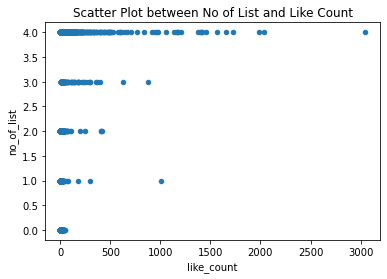

In [193]:
import matplotlib as mpl
import matplotlib.pyplot as plt

CombineResult_SearchforVenues[["no_of_list", "like_count"]].plot(kind='scatter', x = 'like_count', y = 'no_of_list')
plt.title("Scatter Plot between No of List and Like Count")
plt.show()

The above is scattered chart between “no of list” and “like count”. 

That shows:
1.	There are only 5 buckets for “no of list”. (i.e. At most, a venue is only referenced by 4 lists)
2.	Restaurants with high “like count” (i.e. those with > 500 like count) are likely to be referenced in more list (i.e. no of list = 4)
3.	Restaurant with low “like_count” may not referenced by fewer lists.

Not sure why the range of “no of list” is quite small (only between 0 and 4). Maybe it is because the venue list creation is not as widely adopted as like count. However, comparing with “like count”, that make it less effective for identifying which restaurants is more popular.


###### Top 10 Neighborhoods based on the aggregation of like count for all restaurants

In [216]:
temp05 = CombineResult_SearchforVenues[["city", "Neighborhood", "like_count"]].groupby(by=["city","Neighborhood"]).sum()
temp05 = temp05.sort_values(by = "like_count", ascending = False).head(10)
temp06 = CombineResult_SearchforVenues[["city", "Neighborhood", "cnt"]].groupby(by=["city","Neighborhood"]).sum()
temp07 = CombineResult_SearchforVenues[["city", "Neighborhood", "no_of_list"]].groupby(by=["city","Neighborhood"]).sum()
temp05 = pd.merge(temp05, temp06, how="inner", on="Neighborhood")
temp05 = pd.merge(temp05, temp07, how="inner", on="Neighborhood")
temp05

,like_count,cnt,no_of_list
Neighborhood,,,
East Village(Manhattan),8078.0,28,82.0
Mount Hope(Bronx),6522.0,41,94.0
Greenpoint(Brooklyn),4485.0,39,89.0
Prospect Heights(Brooklyn),3578.0,28,79.0
SoHo(Manhattan),3428.0,16,18.0
Upper West Side(Manhattan),3245.0,21,48.0
West Village(Manhattan),3020.0,14,39.0
Tribeca(Manhattan),2940.0,29,49.0
Fish Bay(Bronx),2940.0,20,44.0


###### Obtaining the Premium Data for the venues under top 10 neighbourhoods

In [207]:
venue_detail_list = []
for index, row in venue_of_top10_neigh.iterrows():
    venue_detail_list.append(FourSquare_fct.GetVenueDetail(venue_of_top10_neigh.loc[index,"id"]))
    
temp = pd.concat(venue_detail_list)
venue_of_top10_neigh = pd.merge(venue_of_top10_neigh, temp[["id", "tipCount", "price_tier", "rating", "ratingSignal", how="inner", on="id")

In [215]:
venue_of_top10_neigh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            250 non-null    object 
 1   Neighborhood Latitude   250 non-null    float64
 2   Neighborhood Longitude  250 non-null    float64
 3   id                      250 non-null    object 
 4   Venue                   250 non-null    object 
 5   Venue Latitude          250 non-null    float64
 6   Venue Longitude         250 non-null    float64
 7   distance                250 non-null    int64  
 8   Venue Category          250 non-null    object 
 9   Venue Category ID       250 non-null    object 
 10  city                    250 non-null    object 
 11  cnt                     250 non-null    int64  
 12  level                   250 non-null    int64  
 13  parent_cat_name         250 non-null    object 
 14  parent_cat_id           250 non-null    ob

In [217]:
temp08 = venue_of_top10_neigh[["city", "Neighborhood", "like_count"]].groupby(by=["city","Neighborhood"]).sum()
temp08 = temp08.sort_values(by = "like_count", ascending = False).head(10)
temp09 = venue_of_top10_neigh[["city", "Neighborhood", "cnt"]].groupby(by=["city","Neighborhood"]).sum()
temp10 = venue_of_top10_neigh[["city", "Neighborhood", "no_of_list"]].groupby(by=["city","Neighborhood"]).sum()

temp08 = pd.merge(temp08, temp09, how="inner", on = "Neighborhood")
temp08 = pd.merge(temp08, temp10, how="inner", on = "Neighborhood")

temp11 = venue_of_top10_neigh[["city", "Neighborhood", "tipCount"]].groupby(by=["city","Neighborhood"]).sum()
temp13 = venue_of_top10_neigh[["city", "Neighborhood", "rating"]].groupby(by=["city","Neighborhood"]).mean()
temp14 = venue_of_top10_neigh[["city", "Neighborhood", "ratingSignal"]].groupby(by=["city","Neighborhood"]).sum()


temp08 = pd.merge(temp08, temp11, how="inner", on = "Neighborhood")
temp08 = pd.merge(temp08, temp13, how="inner", on = "Neighborhood")
temp08 = pd.merge(temp08, temp14, how="inner", on = "Neighborhood")

temp15 = venue_of_top10_neigh[["city", "Neighborhood", "price_tier","cnt"]].fillna(-1)
temp15 = temp15.groupby(by=["city","Neighborhood","price_tier"]).sum()
temp15 = temp15.unstack().reset_index()
temp08 = pd.merge(temp08, temp15, how="inner", on = "Neighborhood")
temp08.columns = ['Neighborhood',   'like_count',          'cnt',   'no_of_list',
           'tipCount',       'rating', 'ratingSignal', 'city', 'No pricetier',
         'pricetier 1', 'pricetier 2', 'pricetier 3', 'pricetier 4']
temp08.drop("city", axis = 1, inplace = True)
temp08.fillna(0, inplace = True)
temp08.append({"Neighborhood": "Total", "like_count": "", "cnt": temp08["cnt"].sum(), "no_of_list": "", "tipCount": "",
               "rating": "", "ratingSignal": "", 'No pricetier': temp08["No pricetier"].sum(), 'pricetier 1': temp08["pricetier 1"].sum(), 
               'pricetier 2': temp08["pricetier 2"].sum(), 'pricetier 3': temp08["pricetier 3"].sum(), 'pricetier 4': temp08["pricetier 4"].sum()}, ignore_index = True)

C:\Users\boyce\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\boyce\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Neighborhood,like_count,cnt,no_of_list,tipCount,rating,ratingSignal,No pricetier,pricetier 1,pricetier 2,pricetier 3,pricetier 4
0,East Village(Manhattan),8078,28,82,2717,7.97778,11253,0.0,13.0,14.0,1.0,0.0
1,Mount Hope(Bronx),6522,41,94,2473,7.70833,9201,2.0,24.0,13.0,2.0,0.0
2,Greenpoint(Brooklyn),4485,39,89,1376,7.412,6136,4.0,16.0,19.0,0.0,0.0
3,Prospect Heights(Brooklyn),3578,28,79,1152,7.95789,4824,0.0,13.0,11.0,3.0,1.0
4,SoHo(Manhattan),3428,16,18,1146,7.9,4765,1.0,10.0,4.0,1.0,0.0
5,Upper West Side(Manhattan),3245,21,48,1141,7.34167,4611,3.0,9.0,9.0,0.0,0.0
6,West Village(Manhattan),3020,14,39,1078,7.85,4290,0.0,6.0,4.0,4.0,0.0
7,Fish Bay(Bronx),2940,20,44,1455,7.67692,4496,0.0,9.0,8.0,3.0,0.0
8,Tribeca(Manhattan),2940,29,49,899,6.97143,4271,0.0,15.0,11.0,1.0,2.0
9,Dumbo(Brooklyn),2898,14,35,817,7.88889,4078,0.0,12.0,1.0,1.0,0.0


###### 4.2.5 Price Tier

“Price tier” is an indicator of how expensive a restaurant is. It is from range of 1 to 4 (1: Cheapest, 4: Most Expensive).

Reference to the table above, 
1.	Only 240 restaurants provided “Price tier” indicator 
2.	There are only 19 restaurants under the top two tiers

Further, we explore if there is any correlation between “Price tier” and “Like count”. From the scatter plot below, there is no observable correlation between them.

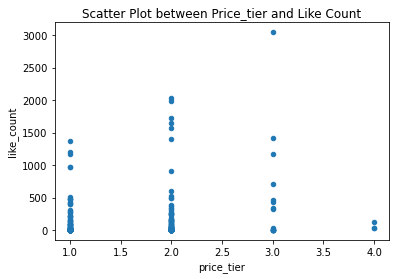

In [221]:
temp16 = pd.DataFrame(venue_of_top10_neigh[(pd.notna(venue_of_top10_neigh["tipCount"]))])
temp16.plot(kind='scatter', x = 'price_tier', y = 'like_count')
plt.title("Scatter Plot between Price_tier and Like Count")
plt.show()

###### 4.2.6 Rating and Rating Signal

Four Square users could rate a restaurant accordingly from 0 to 10, with 10 to be the best rating. “Rating” is the average from all rates received; “Rating Signal” is the number of users provided such rate. In general, “Rating” may be an useful attribute for accessing a restaurant.

(1) Examine if there is any missing data

In [223]:
venue_of_top10_neigh[["id","rating","ratingSignal"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            250 non-null    object 
 1   rating        147 non-null    float64
 2   ratingSignal  147 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.8+ KB


venue_of_top10_neigh

(2) Examine the Rating Distribution

count    147.000000
mean       7.644898
std        1.126103
min        4.600000
25%        6.800000
50%        7.900000
75%        8.550000
max        9.400000
Name: rating, dtype: float64

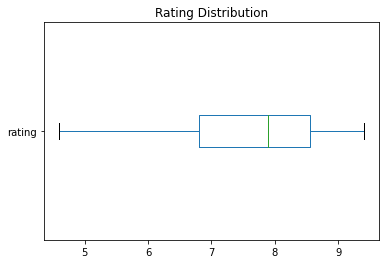

In [226]:
temp17 = venue_of_top10_neigh[["city", "Neighborhood", "rating", "ratingSignal", "like_count", "price_tier", "tipCount", "cnt"]]
temp17 = pd.merge(temp17, temp08[["Neighborhood"]], how = "inner", on = "Neighborhood")
temp17["rating"].plot(kind ="box", vert=False)
plt.title("Rating Distribution")
temp17["rating"].describe()

(3) Examine the Rating Signal Distribution

count     147.000000
mean      394.047619
std       643.395406
min         0.000000
25%        35.500000
50%       147.000000
75%       446.500000
max      4206.000000
Name: ratingSignal, dtype: float64

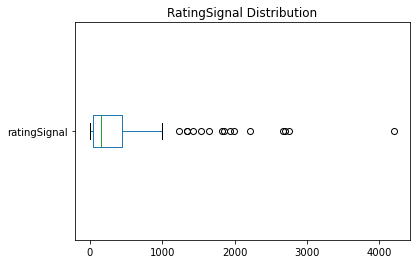

In [227]:
temp17["ratingSignal"].plot(kind ="box", vert=False)
plt.title("RatingSignal Distribution")
temp17["ratingSignal"].describe()

In [228]:
temp18 = temp17[["cnt"]].groupby(pd.cut(temp17["ratingSignal"], [-1,0,1,10, 100, 300, 500, 1000,5000])).count()
temp18

,cnt
ratingSignal,
"(-1, 0]",1
"(0, 1]",0
"(1, 10]",9
"(10, 100]",51
"(100, 300]",34
"(300, 500]",19
"(500, 1000]",18
"(1000, 5000]",15


(4) Examine the correlations among the attributes: (1) Rating, (2) RatingSignal , (3) like count and (4) Price tier.

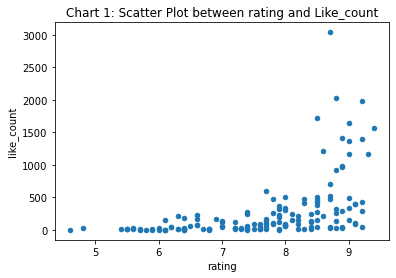

In [235]:
temp17.plot(kind='scatter', x = 'rating', y = 'like_count')
plt.title("Chart 1: Scatter Plot between rating and Like_count")
plt.show()

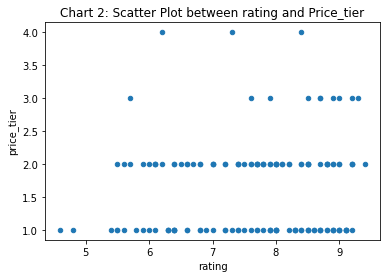

In [236]:
temp17.plot(kind='scatter', x = 'rating', y = 'price_tier')
plt.title("Chart 2: Scatter Plot between rating and Price_tier")
plt.show()

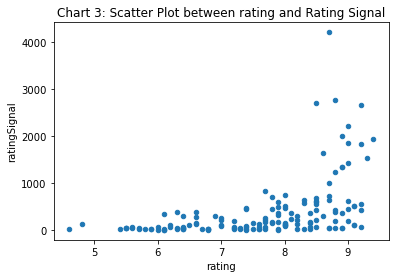

In [241]:
temp17.plot(kind='scatter', x = 'rating', y = 'ratingSignal')
plt.title("Chart 3: Scatter Plot between rating and Rating Signal")
plt.show()

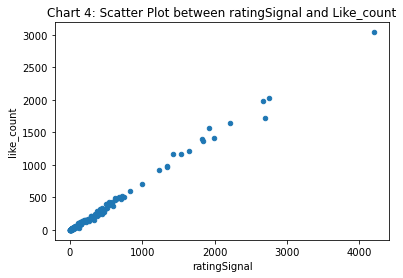

In [238]:
temp17.plot(kind='scatter', x = 'ratingSignal', y = 'like_count')
plt.title("Chart 4: Scatter Plot between ratingSignal and Like_count")
plt.show()

1.	In Chart 1, it is observed that, for data with “ratingSignal” lower than 500 (i.e. less than 500 users have rated), they are quite widely distributed. It could be interpreted that the same rating (high or low) could be rated by small group of people or large group of people. Nevertheless, the correlation between them is weak.
2.	In Chart 2, it is found that the pattern is very similar to Chart 1. While it shows the correlation between “Rating” and “Like count” is weak, it indicates the correlation between “ratingSignal” and “Like count” could be strong. That’s proved by Chart 4.
3.	In Chart 3, it shows the average rating in Price Tier 3 are the best and that of Price Tier 1 is the worst.

Overall, it shows that, while “Rating” is designed to rate a restaurant, direct adoption of that to interpret the popularity may be misleading. For example, with two restaurants of rating of 9.0, the one with only 3 rates and the one with 1000 rates shouldn’t consider with the same popularity. Thus, “like count” is considered a better indicator for that.

###### 4.2.7 Tip Count

Four Square user could leave comment on the restaurant called tips. While the tip could be good or bad, the high number of tips is likely to be related to its popularity.

count     250.000000
mean       57.016000
std       134.304753
min         0.000000
25%         0.000000
50%         5.000000
75%        52.750000
max      1050.000000
Name: tipCount, dtype: float64

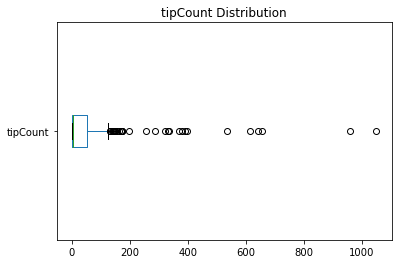

In [239]:
temp17["tipCount"].plot(kind ="box", vert=False)
plt.title("tipCount Distribution")
temp17["tipCount"].describe()

<AxesSubplot:xlabel='Range'>

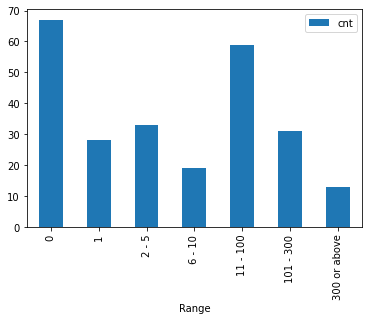

In [242]:
temp19 = temp17[["cnt"]].groupby(pd.cut(temp17["tipCount"], [-1,0,1,5,10,100, 300, 1100])).count()
temp19 = temp19.reset_index()
temp19['Range'] = ["0", "1", "2 - 5", "6 - 10", "11 - 100", "101 - 300", "300 or above"]
temp19.drop("tipCount", axis=1, inplace = True)
temp19.set_index("Range").plot(kind="bar")

Regarding “TipCount”, the distribution is shown as charts and table above. The variance is quite big and there are quite a lot of outliners. From the chart on the right-hand side, quite a lot of restaurants (>70) are without tipCount.

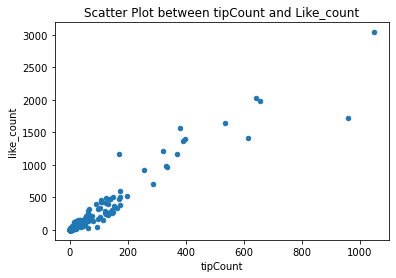

In [243]:
temp17.plot(kind='scatter', x = 'tipCount', y = 'like_count')
plt.title("Scatter Plot between tipCount and Like_count")
plt.show()

From the scattered chart above, it has strong correlation with like_count.

Overall, it could be summarized that a restaurant with more “Like count” would attract more users to rate and more users to provide tips to such place. However, its “Rating” is from the average of rates of all users are depend on its user group, which could be big or small.

#### 4.3 Chinese Restaurants

This part is to explore the distribution of Chinese Restaurant among the two cities: New York and Toronto.

In [252]:
Chinese_Rest = CombineResult_SearchforVenues[(CombineResult_SearchforVenues["Venue Category ID"]=="4bf58dd8d48988d145941735")|(CombineResult_SearchforVenues["parent_cat_id"]=="4bf58dd8d48988d145941735")]
Chinese_Rest = pd.merge(Chinese_Rest, ref1, how="left", on = "id")
Chinese_Rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 446
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            447 non-null    object 
 1   Neighborhood Latitude   447 non-null    float64
 2   Neighborhood Longitude  447 non-null    float64
 3   id                      447 non-null    object 
 4   Venue                   447 non-null    object 
 5   Venue Latitude          447 non-null    float64
 6   Venue Longitude         447 non-null    float64
 7   distance                447 non-null    int64  
 8   Venue Category          447 non-null    object 
 9   Venue Category ID       447 non-null    object 
 10  city                    447 non-null    object 
 11  cnt                     447 non-null    int64  
 12  level                   447 non-null    int64  
 13  parent_cat_name         447 non-null    object 
 14  parent_cat_id           447 non-null    ob

In [258]:
Chinese_Rest[["city", "price_tier", "cnt"]].pivot_table(index = ["price_tier"], columns=["city"], aggfunc = np.sum).fillna(0)

cnt      
city           NY    TO
price_tier             
1.0         313.0  77.0
2.0          19.0  12.0
3.0           2.0   0.0
4.0           0.0   2.0

From the table and as illustrated in Section 5.2.2 above, 
1.	Chinese Restaurant are more common in New York compared to Toronto.
2.  Only four of them (a very small number) are in high-tier price range.


In [259]:
temp21 = Chinese_Rest[["city", "like_count", "cnt"]].pivot_table(index = ["like_count"], columns=["city"], aggfunc = np.sum).fillna(0)

temp21 = temp21.groupby(pd.cut(temp21.index, [-1,0,1,2,10,100,500,800])).sum()
temp21 = temp21.reset_index()
temp21['Range'] = ["0", "1", "2", "3 - 10", "11 - 100", "101 - 500", "500 or above"]
temp21.drop("index", axis=1, inplace = True)
cols = temp21.columns.tolist()
cols = cols[-1:] + cols[:-1]
temp21 = temp21[cols]
temp21

C:\Users\boyce\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Range    cnt      
city                   NY    TO
0                0  147.0  62.0
1                1   83.0  15.0
2                2   42.0  10.0
3           3 - 10   52.0   8.0
4         11 - 100   12.0   8.0
5        101 - 500    7.0   0.0
6     500 or above    1.0   0.0

From the table above in which Chinese restaurants are grouped by “Like count” range, all restaurants with high “Like count” are all in New York.

Visualization of Chinese Restaurant on Map

(1) New York

In [261]:
a001 = Chinese_Rest[Chinese_Rest["city"]=="NY"]
FourSquare_fct.drawvenuelist("NY", a001, 10)

(2) Toronto

In [262]:
a001 = Chinese_Rest[Chinese_Rest["city"]=="TO"]
FourSquare_fct.drawvenuelist("TO", a001, 10)

## 5 Result and Discussion

From Section 4 above, there are a few attributes by Four Square, which are useful to access how popular a restaurant is. They are “Like count”, “No of List”, “Rating”, “RatingSignal” and “Tip Count”. However, we choose to use “Like count” as the key attribute for the assessment because:

(1)	It is standard data instead of premium data so that we don’t have limitation on data availability.

(2)	There are no missing data.

(3)	It has a wide range of value available which could differential the restaurants in a granular level.

(4)	It also shows correlation with other attributes.

Based on aggregation of like count, 10 neighborhoods are shortlisted as below:

In [263]:
temp08.append({"Neighborhood": "Total", "like_count": "", "cnt": temp08["cnt"].sum(), "no_of_list": "", "tipCount": "",
               "rating": "", "ratingSignal": "", 'No pricetier': temp08["No pricetier"].sum(), 'pricetier 1': temp08["pricetier 1"].sum(), 
               'pricetier 2': temp08["pricetier 2"].sum(), 'pricetier 3': temp08["pricetier 3"].sum(), 'pricetier 4': temp08["pricetier 4"].sum()}, ignore_index = True)

,Neighborhood,like_count,cnt,no_of_list,tipCount,rating,ratingSignal,No pricetier,pricetier 1,pricetier 2,pricetier 3,pricetier 4
0,East Village(Manhattan),8078,28,82,2717,7.97778,11253,0.0,13.0,14.0,1.0,0.0
1,Mount Hope(Bronx),6522,41,94,2473,7.70833,9201,2.0,24.0,13.0,2.0,0.0
2,Greenpoint(Brooklyn),4485,39,89,1376,7.412,6136,4.0,16.0,19.0,0.0,0.0
3,Prospect Heights(Brooklyn),3578,28,79,1152,7.95789,4824,0.0,13.0,11.0,3.0,1.0
4,SoHo(Manhattan),3428,16,18,1146,7.9,4765,1.0,10.0,4.0,1.0,0.0
5,Upper West Side(Manhattan),3245,21,48,1141,7.34167,4611,3.0,9.0,9.0,0.0,0.0
6,West Village(Manhattan),3020,14,39,1078,7.85,4290,0.0,6.0,4.0,4.0,0.0
7,Fish Bay(Bronx),2940,20,44,1455,7.67692,4496,0.0,9.0,8.0,3.0,0.0
8,Tribeca(Manhattan),2940,29,49,899,6.97143,4271,0.0,15.0,11.0,1.0,2.0
9,Dumbo(Brooklyn),2898,14,35,817,7.88889,4078,0.0,12.0,1.0,1.0,0.0


At the same time, these 10 neighborhoods also covered 46 out of top 100 restaurants in term of like count across both cities, New York and Toronto.
As the goal is to open an upper tier dining place, it is preferable to have a neighbourhood which have similar restaurant arounds. Therefore, the 4 neighbourhoods, which are with more price tier 3 and 4 restaurants, are preferable. They are “Prospect Heights (Brooklyn)”, “West Village (Manhattan)”, “Fish Bay (Bronx)”, “Tribeca (Manhattan)”.  
We further visualized the restaurant distribution for these neighbourhoods as below


(1) Prospect Heights (Brooklyn)

In [267]:
a001 = venue_of_top10_neigh[((venue_of_top10_neigh["Neighborhood"]=="Prospect Heights(Brooklyn)"))]
FourSquare_fct.drawvenuelist("NY", a001, 15)

(2) West Village (Manhattan)

In [268]:
a001 = venue_of_top10_neigh[(venue_of_top10_neigh["Neighborhood"]=="West Village(Manhattan)")]
FourSquare_fct.drawvenuelist("NY", a001, 10)

(3) Fish Bay (Bronx)

In [269]:
a001 = venue_of_top10_neigh[(venue_of_top10_neigh["Neighborhood"]=="Fish Bay(Bronx)")]
FourSquare_fct.drawvenuelist("NY", a001, 10)

(4) Tribeca (Manhattan)

In [270]:
a001 = venue_of_top10_neigh[(venue_of_top10_neigh["Neighborhood"]=="Tribeca(Manhattan)")]
FourSquare_fct.drawvenuelist("NY", a001, 10)

In view of the result above, it is recommended that the “West Village (Manhattan)” is preferable neighborhood because 

a.	It is the top10 neighborhood in term of like-count.

b.	It is a high-end dining area. It has 4 restaurants with price tier 3 or above. 

c.	Among those 4 restaurants, three have received quite a lot of like counts and two of them are Chinese Restaurants. It could help to establish a Chinese Fine Dining area to draw potential customers.


## 6 Conclusion

In the analysis above, we have compared the neighborhoods among New York & Toronto and recommended the best neighborhood to open a new the high-end Chinese Restaurant. Throughout the project, while there is no complicated algorithm and data modeling involved, most of the effort was spent are on data collecting, understanding & cleaning. It reflected what this course said before: 80% of effort is on those area. After all the data are tidy up, the analysis is almost completed.

At the same time, it is important to note that the analysis result is highly relied to the quality of Four Square location data and its availability of data. We would need to assume that Four Square would have a good coverage and representation for the venues in both cities. At the same time, the users from both cities are equally active and familiar with the tools from Four Square.
